# Libraries installations for MLP

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
#It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Package fo Dataframe and Visualization for EDA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Dummy
from sklearn.dummy import DummyClassifier

# Pre-Processing packages

# To enocode Categorical Variables
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# For Standardizing featuires and to balance scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# To automate the flow of applied function
from sklearn.pipeline import Pipeline,FeatureUnion

from sklearn.compose import ColumnTransformer, make_column_selector

# For handling missing data
from sklearn.impute import SimpleImputer

# Packages for Building Model
from sklearn.svm import SVC, LinearSVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier


# Packages for feature engineering & Model development
#For chaecking the performance of the models
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

# Splitting Data and validation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

# for feature engineering
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel, RFE

from sklearn.decomposition import PCA

# for Disabling Warning prints
import warnings

warnings.filterwarnings('ignore')


# For imbalanced data
from imblearn.over_sampling import SMOTE

# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Data Loading Packages

import os



for dirname, _, filenames in os.walk('/kaggle/input'):



    for filename in filenames:



        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# Dataset Description

The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.



Input variables:



1. last contact date: last contact date

2. age (numeric)

3. job : type of job

4. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means    divorced or widowed)

5. education (categorical: "unknown","secondary","primary","tertiary")

6. default: has credit in default? (binary: "yes","no")

7. balance: average yearly balance, in euros (numeric)

8. housing: has housing loan? (binary: "yes","no")

9. loan: has personal loan? (binary: "yes","no")

10. contact: contact communication type (categorical: "unknown","telephone","cellular")

11. duration: last contact duration, in seconds (numeric)

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

    


# **Data Loading**

In [2]:
input_train = "/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv"

input_test = "/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv"

In [3]:
data = pd.read_csv(input_train) # Loading data as a dataframe

In [4]:
df = data.copy()  # Duplicating data to avoid making changes in the original data.

# Exploratory and Statistical Data Analysis

In [5]:
df.head(n=5)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [6]:
df.shape

(39211, 16)

* There are 39211 rows a.k.a Observations

* 16 columns that is features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

* poutcome has less non-null values
* There are 6 Numerical and 10 categorical Columns

In [8]:
# Seperating categorical and numberical columms for applying appropriate function according to type.

cat_col = make_column_selector(dtype_include=object) # categorical columns

num_col = make_column_selector(dtype_include=np.number) # Numerical Columns

In [9]:
df.describe().T # Statistical Properties of numercal columns

,count,mean,std,min,25%,50%,75%,max
age,39211.0,42.120247,12.709352,18.0,33.0,40.0,50.0,95.0
balance,39211.0,5441.781719,16365.292065,-8019.0,98.0,549.0,2030.0,102127.0
duration,39211.0,439.062789,769.096291,0.0,109.0,197.0,380.0,4918.0
campaign,39211.0,5.108770,9.890153,1.0,1.0,2.0,4.0,63.0
pdays,39211.0,72.256051,160.942593,-1.0,-1.0,-1.0,-1.0,871.0
previous,39211.0,11.826171,44.140259,0.0,0.0,0.0,0.0,275.0


Observations

1. Average age of a client 42 years. Maximum is 95 and Minimum is 18.

2. Balance: * Minimum of a balance is -8019 and maximum 102127 in euros. There are outlieirs.


In [10]:
df.describe(include='object') # Statistical properties of categorical variables

,last contact date,job,marital,education,default,housing,loan,contact,poutcome,target
count,39211,38982,39211,37744,39211,39211,39211,28875,9760,39211
unique,1013,11,3,3,2,2,2,2,3,2
top,2009-05-15,blue-collar,married,secondary,no,yes,no,cellular,failure,no
freq,313,7776,22691,19584,36954,21657,31820,25030,4949,33384


In [11]:
# percentage of missing values in the datsaset

percent_missing = ((df.isnull().sum()/ len(df)) * 100 ).round(2)

percent_missing_df = pd.DataFrame({'Column': df.columns,
                                 'percent': percent_missing})

percent_missing_df

,Column,percent
last contact date,last contact date,0.00
age,age,0.00
job,job,0.58
marital,marital,0.00
education,education,3.74
default,default,0.00
balance,balance,0.00
housing,housing,0.00
loan,loan,0.00
contact,contact,26.36


In [12]:
#   Removing columns
df = df.drop(columns=['poutcome', 'last contact date'], axis = 1)
#1. poutcome =  more than 50% missing values
#2. last contact date = Not needed for prediction

In [13]:
df[cat_col].isnull().sum() #Looking at nulls in categorical values

job            229
marital          0
education     1467
default          0
housing          0
loan             0
contact      10336
target           0
dtype: int64

There are missing values in categorical columns in











1.   Job



2.   education



3. contact


























In [14]:
df[num_col].isnull().sum() # No null values in numeric columns

age         0
balance     0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [15]:
# Unique values in job column
count = 1
for col in cat_col(df):
    print(f"{count}.{col}:{list(df[col].unique())}\n")
    count +=1

1.job:['blue-collar', 'technician', 'admin.', 'entrepreneur', 'unemployed', 'management', 'services', 'student', 'self-employed', 'retired', 'housemaid', nan]

2.marital:['married', 'single', 'divorced']

3.education:['secondary', 'tertiary', 'primary', nan]

4.default:['no', 'yes']

5.housing:['yes', 'no']

6.loan:['no', 'yes']

7.contact:['cellular', 'telephone', nan]

8.target:['no', 'yes']



In [16]:
print(df['target'].value_counts()) # Count of target

yes = df[df['target'] == 'yes'] # Rows having yes in target column

no = df[df['target'] == 'no'] # Rows having no in target column

percentage_yes = (yes.shape[0] / df.shape[0] * 100)
print(f"Percentage of 'yes' values: {percentage_yes:.2f} %")

percentage_no = (no.shape[0] / df.shape[0] * 100)
print(f"Percentage of 'no' values: {percentage_no:.2f} %")

target
no     33384
yes     5827
Name: count, dtype: int64
Percentage of 'yes' values: 14.86 %
Percentage of 'no' values: 85.14 %


Imbalance in dataset. Out of 39211 rows, 14.86 percent have yes in target column.

# Visualization

 **Starting with Categorical Feautures**

Assumptions made :

Features like Housing, loan, education may be correlated with target as these factors influence the decisions of clients of taking subscriptions or not.

Text(0, 0.5, 'Housing')

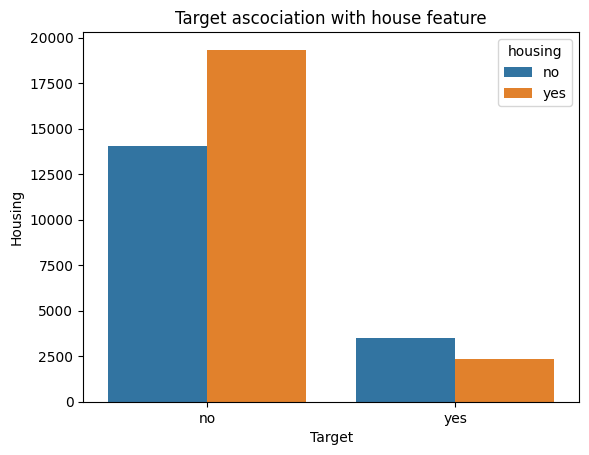

In [17]:
#Checking Association with the target with house feature
house = df.groupby(['target', 'housing']).size().reset_index(name='count')

sns_house = sns.barplot(x='target', y='count', hue='housing', data=house)
sns_house.set_title('Target ascociation with house feature') # Title of the plot
sns_house.set_xlabel('Target') # X label
sns_house.set_ylabel('Housing') # y abel

Clients having subscriptions mostly don't have housing loan. Whereas who do not have subscription have housing loans.

Text(0, 0.5, 'Education feature')

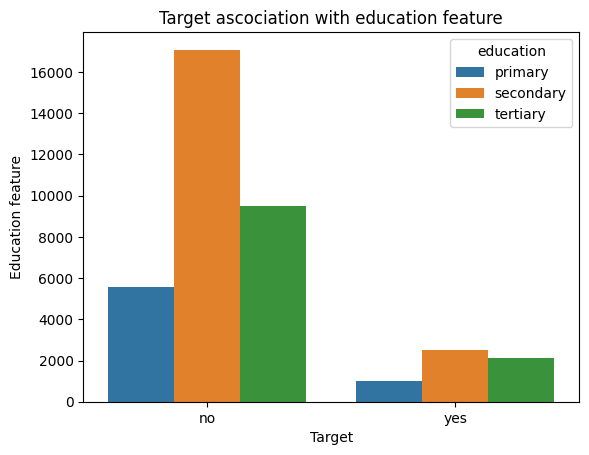

In [18]:
#Grouped target with education to check it's significance
edu = df.groupby(['target', 'education']).size().reset_index(name='count')

edu = sns.barplot(x='target', y='count', hue='education', data=edu)
sns.set_palette("husl")
sns.set_style("darkgrid")
edu.set_title('Target ascociation with education feature')
edu.set_xlabel('Target')
edu.set_ylabel('Education feature')

Both of the classes have same pattern

Text(0, 0.5, 'Loan')

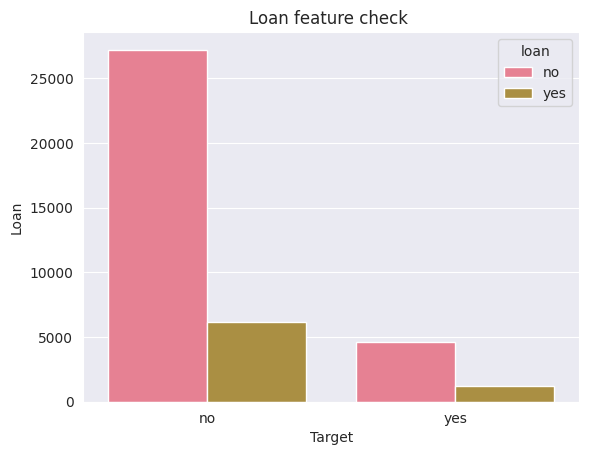

In [19]:
# Checking any influence of loan on target
loan =df.groupby(['target', 'loan']).size().reset_index(name='count')

loan = sns.barplot(x='target', y='count', hue='loan', data=loan)
sns.set_theme(style="whitegrid",color_codes= True)
sns.set_style("darkgrid")
loan.set_title('Loan feature check ')
loan.set_xlabel('Target')
loan.set_ylabel('Loan')

No difference

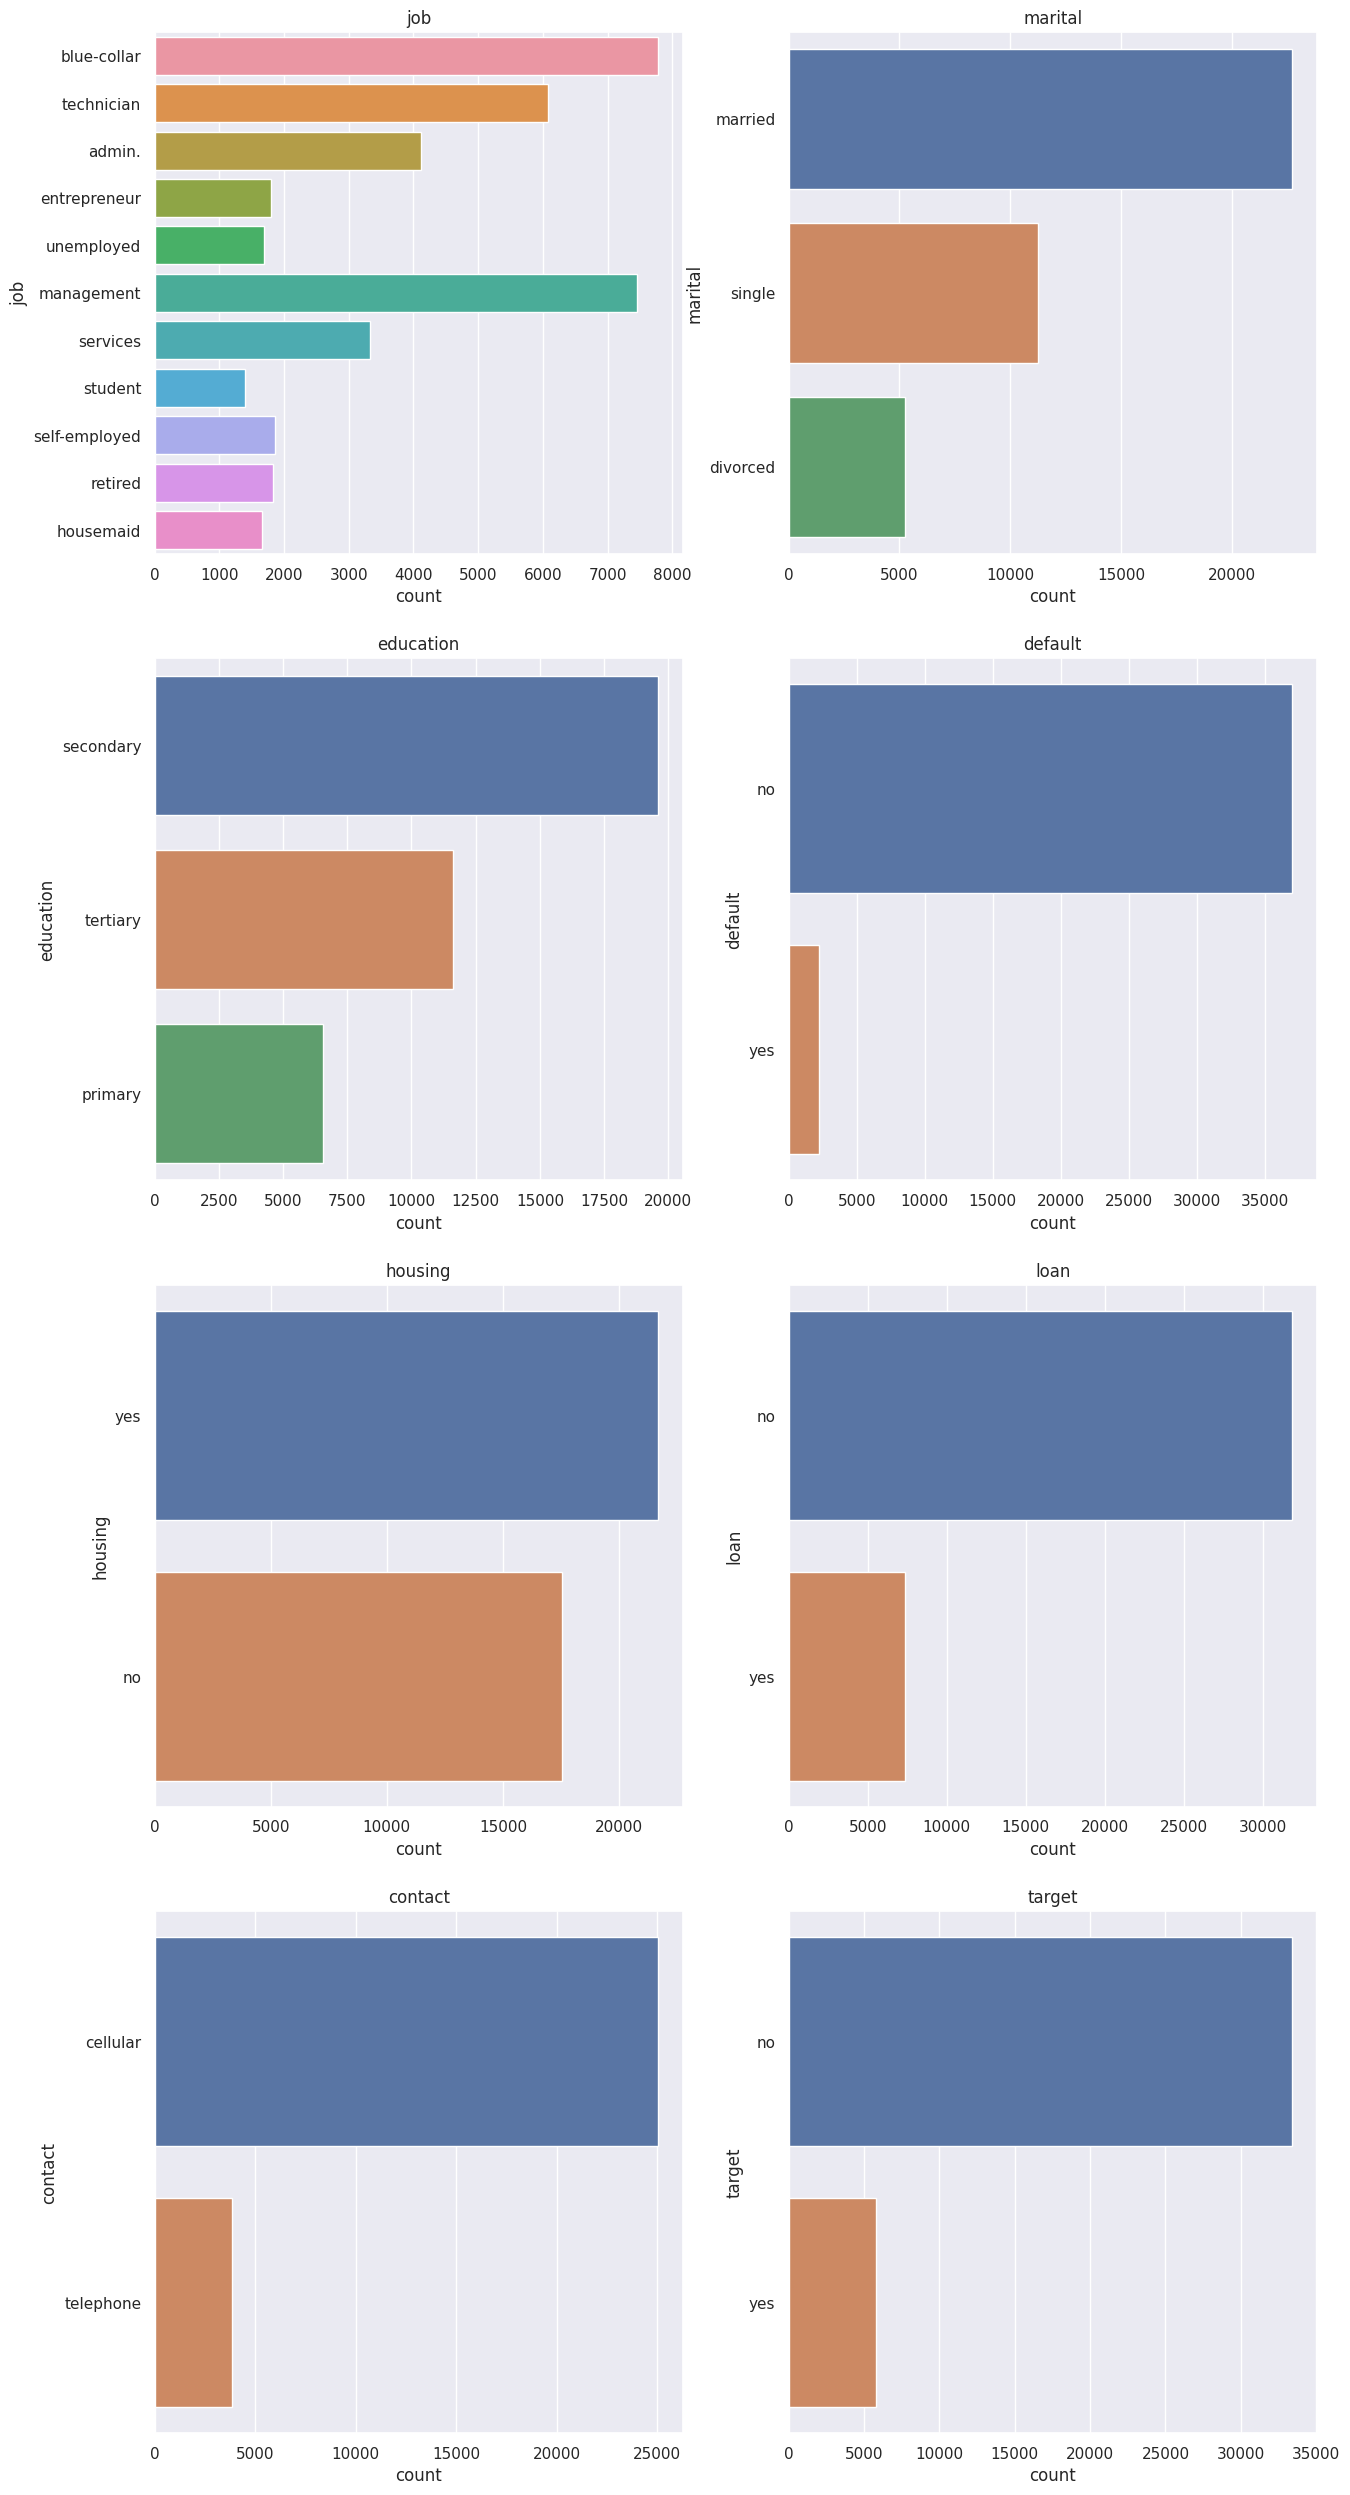

In [20]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')

plotnumber =1

for col in cat_col(df):

    ax = plt.subplot(10,2,plotnumber) #Plot each category in categorical column

    sns.countplot(y=col,data=df)

    plt.title(col)

    plotnumber+=1

plt.show()

1. In job: Most of the jobs have "Blue collar" and "Management"

Text(0.5, 0, 'Target')

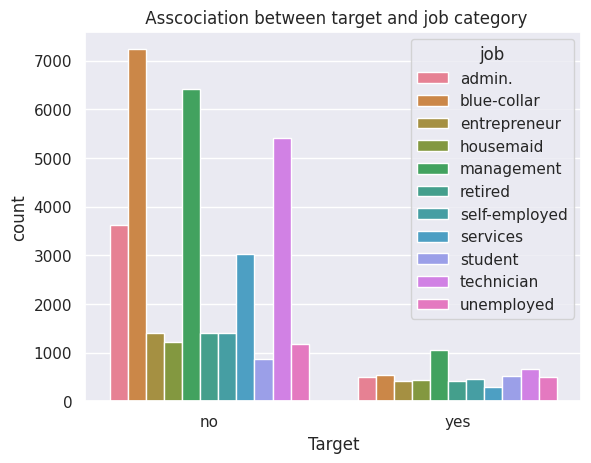

In [21]:
job = df.groupby(['target', 'job']).size().reset_index(name='count')

job = sns.barplot(x='target', y='count', hue='job', data=job, palette='husl', dodge=True)
sns.set_theme(style="whitegrid",color_codes= True)
job.set_title(' Asscociation between target and job category')
job.set_xlabel('Target')

* Jobs like management is high in both class, service and entrprenaur is low in yes class.
* Blue-collar is high in no class followedby management and technician and services.  

In [22]:
# Now check with every categorical column
categorical_data_with_target = []

for categorical_feature in  iter(cat_col(df)) :
     grouped_data= df.groupby(['target',categorical_feature]).size()
     grouped_data['feature'] = categorical_feature
     categorical_data_with_target.append(grouped_data)
categorical_data_with_target

[target   job          
 no       admin.           3622
          blue-collar      7236
          entrepreneur     1399
          housemaid        1225
          management       6412
          retired          1408
          self-employed    1398
          services         3025
          student           865
          technician       5410
          unemployed       1179
 yes      admin.            494
          blue-collar       540
          entrepreneur      406
          housemaid         431
          management       1050
          retired           416
          self-employed     464
          services          300
          student           528
          technician        668
          unemployed        506
 feature                    job
 dtype: object,
 target   marital 
 no       divorced       4194
          married       20010
          single         9180
 yes      divorced       1076
          married        2681
          single         2070
 feature              mar

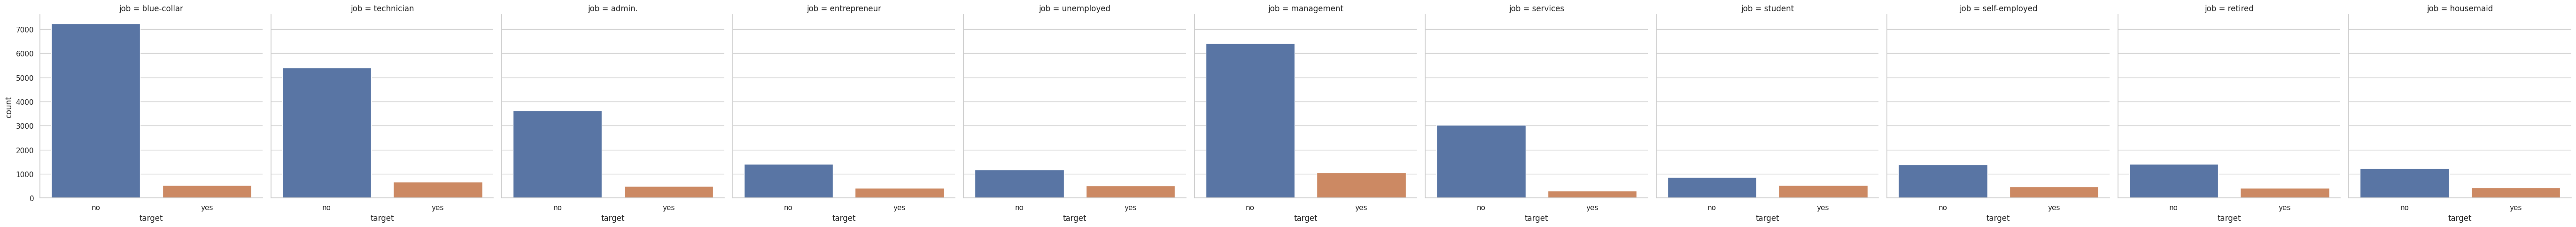

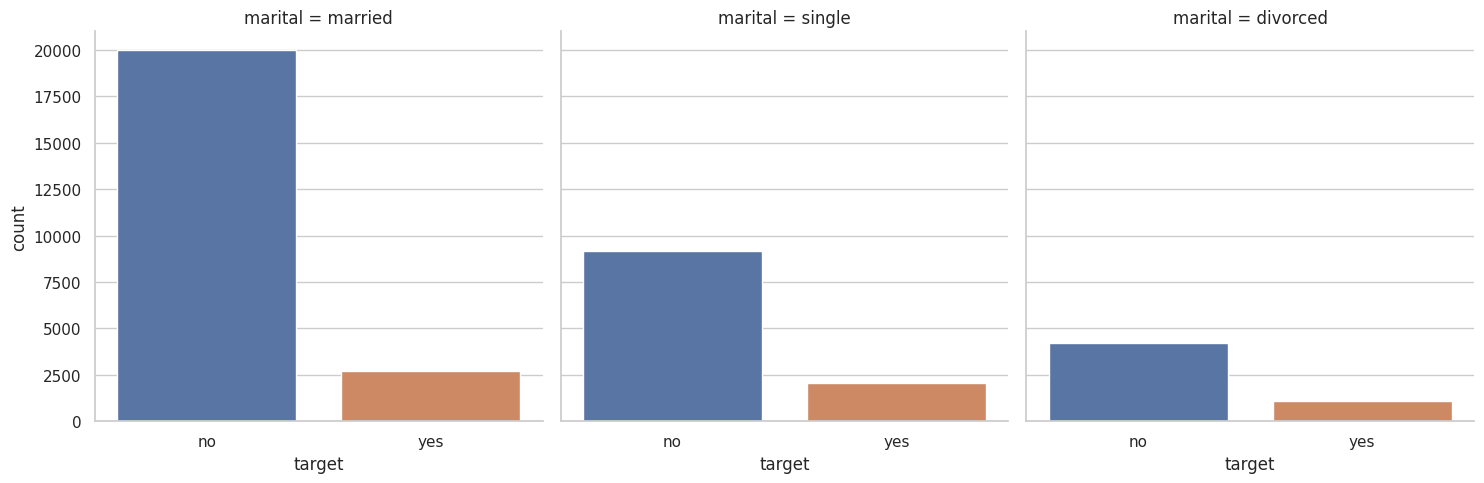

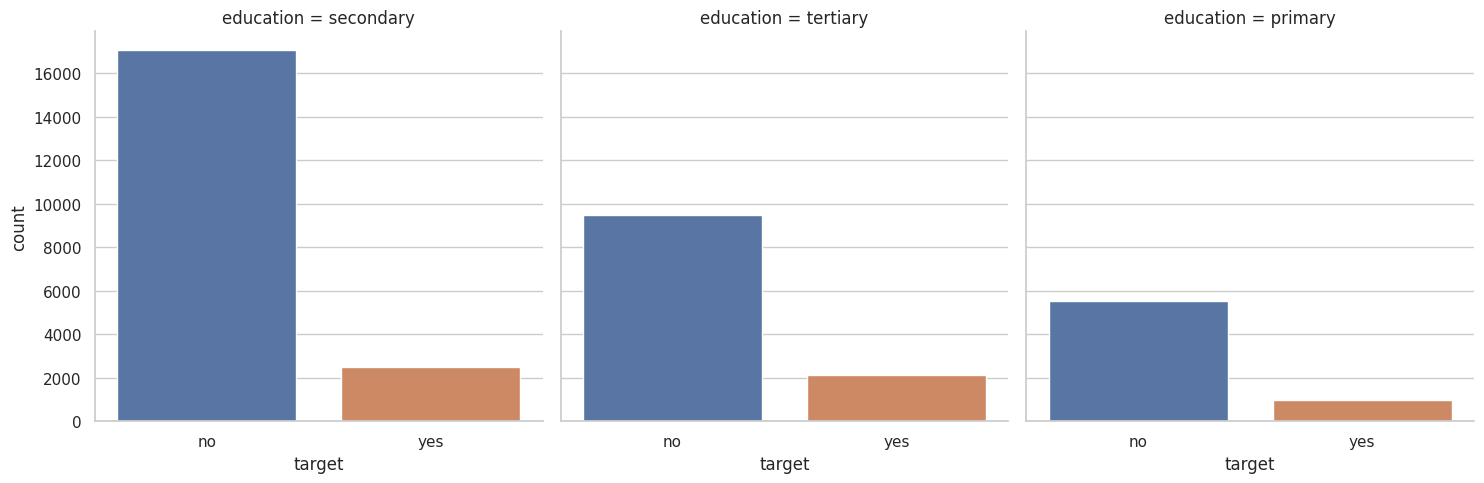

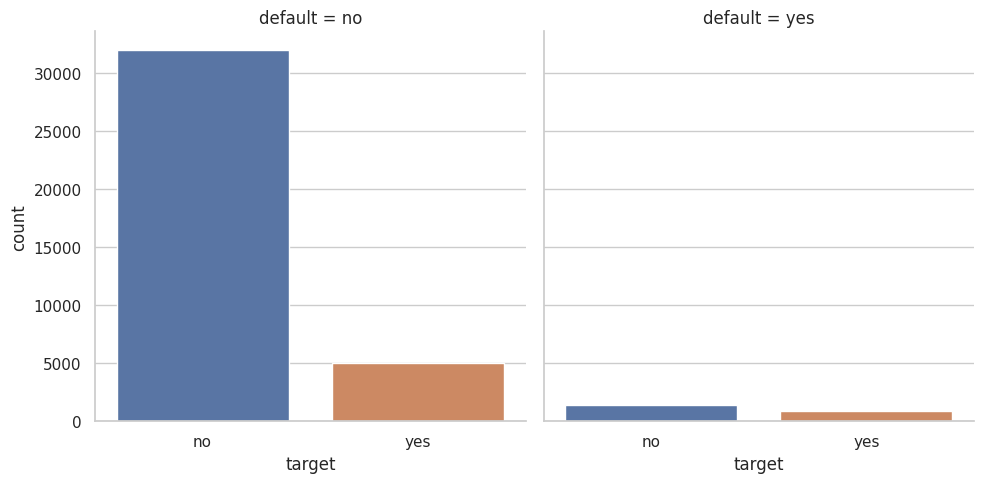

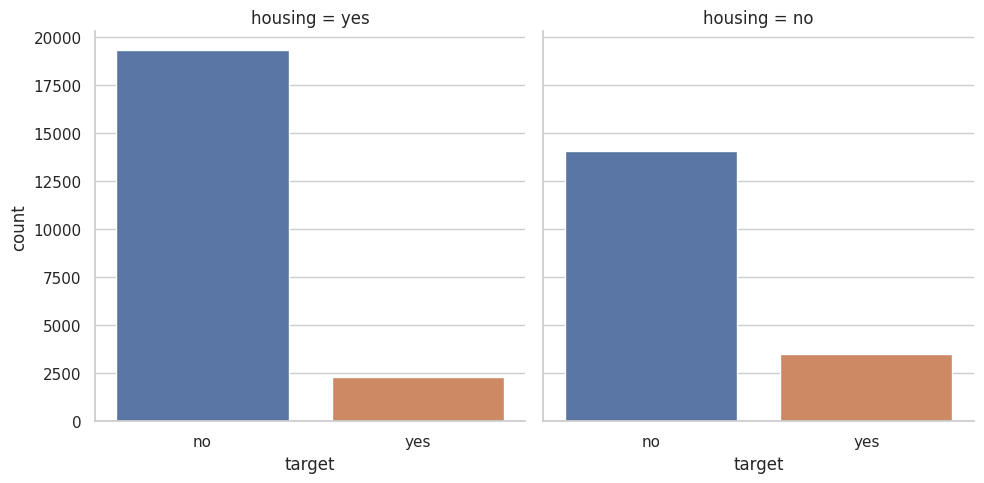

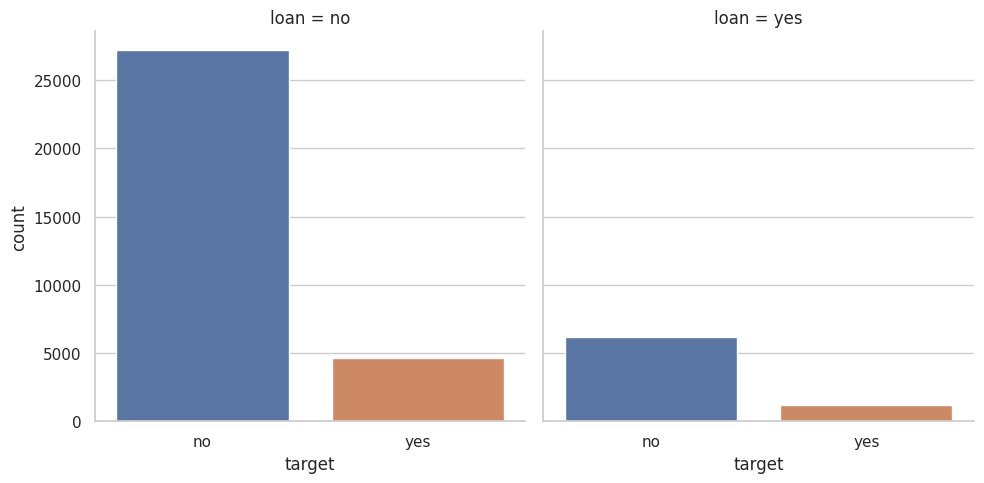

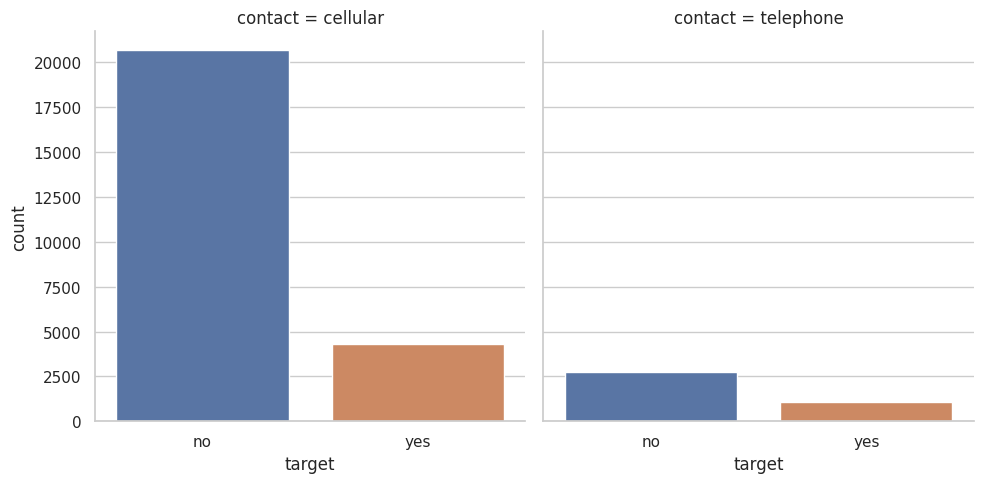

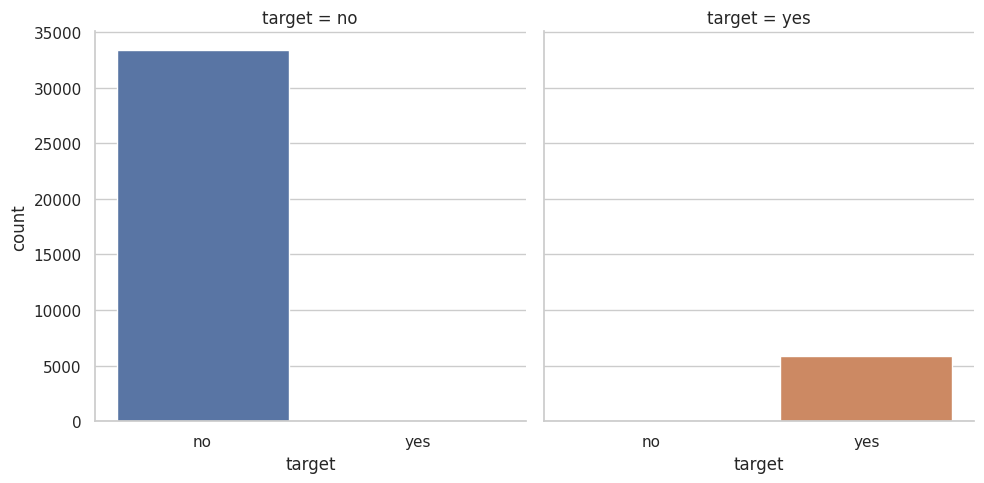

In [23]:
# Finally check with categorical to know any insights with visualization
for categorical_feature in iter(cat_col(df)):

    sns.catplot(x='target', col=categorical_feature, kind='count', data= df)
plt.show()

**Numerical Features**

Text(0.5, 1.0, 'Age Distribution')

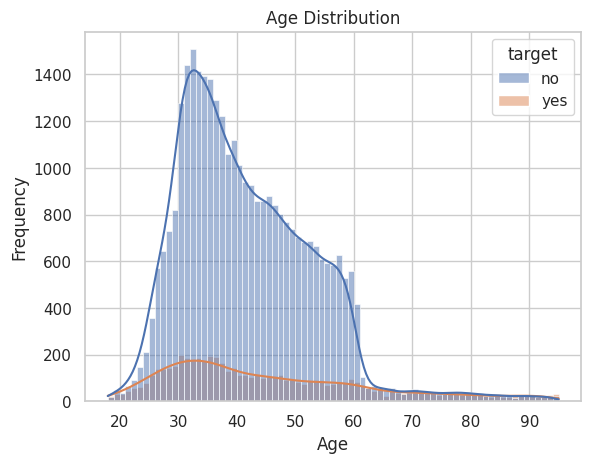

In [24]:
# Plotting age feature as a barplot to know it's distribution.
ax = sns.histplot(df,x= 'age', kde = True,hue = 'target')
ax.set(xlabel='Age', ylabel='Frequency')
ax.set_title('Age Distribution')


From the graph the mean age is in the range of 30 - 40 group



and it is a left skewed Normal Distribution

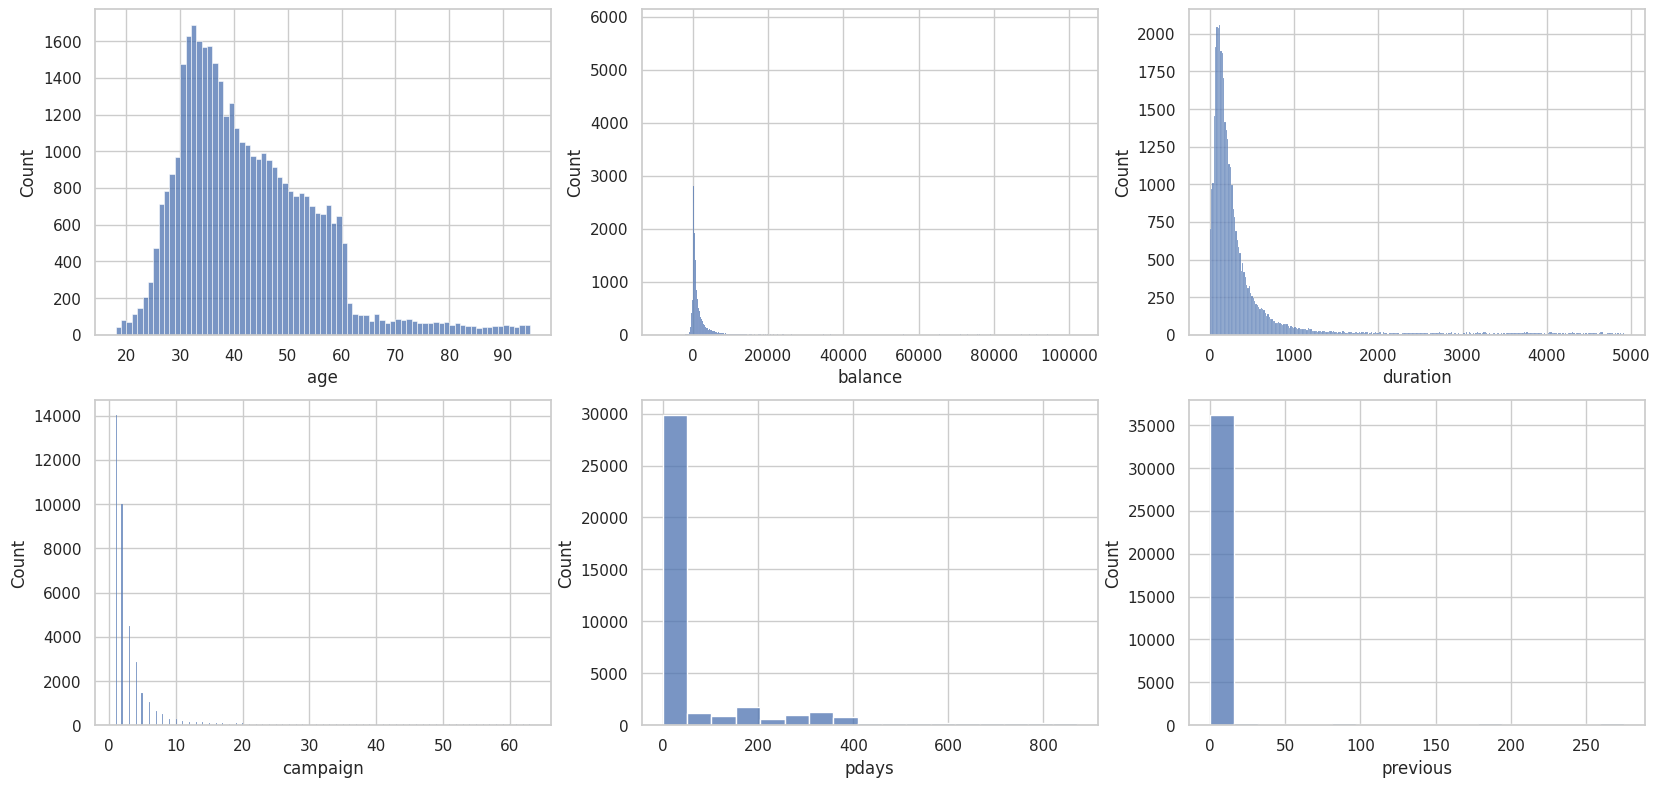

In [25]:
# Checking distributions of the numerical columns
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for col in num_col(df):
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[col])
    plt.xlabel(col)
    plotnumber+=1
plt.show()

* There are outliers present in the data and most of the observations are consistent (eg. previous, pdays )
* Balance is mostly different for every clients hence, specific pattern.

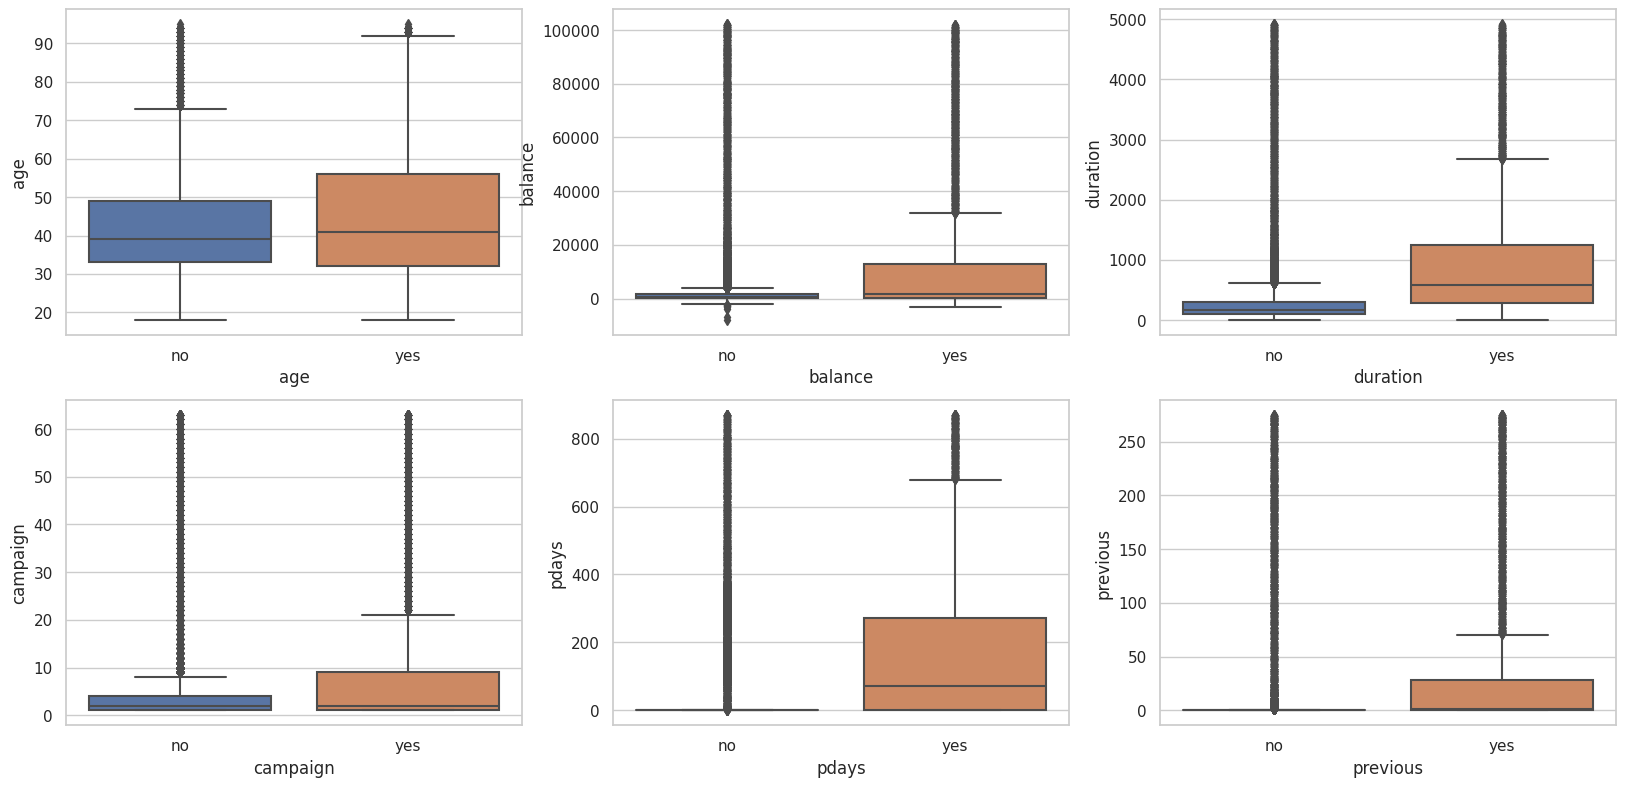

In [26]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_col(df):
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="target", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

1. In Balance it is expected to have outliers, as it is logical that not each and every client will have the exact balance as everyone.

2. Duration, it is seen that higher the duration, higher the count of yes, it relays that clients who have conversated for longer duration have subscribed.

3. Same with campaign and pdays and previous

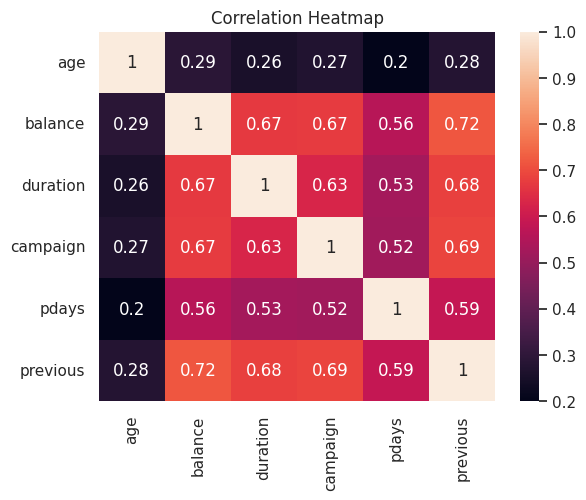

In [27]:
sns.heatmap(df[num_col].corr(), annot=True)

plt.title('Correlation Heatmap')

plt.show()

* Duration almost have good co-relation with every feature.
* Age deos not impact much on any feature
* Aside all the other feautures are fairly co-related.

# **Data Splitting**

In [28]:
# Seprationg data and target(one to predict)
X = df.drop('target', axis = 1) # X = All the features columns (data)
y = df['target'] # target column (to predict)

In [29]:
# Dividing the data further into training set (to train the model)
# And in validation or test set to check the performance of model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

In [30]:
# After spiltting data the number of rows in respected sets are
print(f"X_val shape: {X_val.shape}") # 39211 * 0.1 = 3922
print(f"X_train shape: {X_train.shape}") # 39211 - 3922 = 35289

X_val shape: (3922, 13)
X_train shape: (35289, 13)


# PRE- PROCESSING

In [31]:
# cat_pipe = Creating transformations pipeline for  categorical data
cat_pipe = Pipeline(steps = [


      #imp for Imputer
    ('imp', SimpleImputer(strategy='most_frequent')), # to fill any missing value in categorical data


     # ohe for OneHotEncoder
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop = 'first', sparse_output=False))])
     # Encode all the categorical data into numerics without any order



# Using ColumnTransformer to tranform selected column in line
transform_df  = ColumnTransformer(transformers=[

    ('cat', cat_pipe,cat_col(X)),
     # Applying transformation on categorical columns

    #StandardScaler to bring all features unit to same scale range which is between 0 and 1
    ('num', StandardScaler() ,num_col(X))
     # Applying transformation on Numerical  columns


    ]).set_output(transform='pandas') # To get the output as a dataframe

In [32]:
# Applying transformation on train and validation data
tr_train = transform_df.fit_transform(X_train)
tr_val = transform_df.transform(X_val)

In [33]:
print("After Pre- processing:")
print(f"Train Data shape: {tr_train.shape}\nValidatioin data Shape: {tr_val.shape}" )

After Pre- processing:
Train Data shape: (35289, 24)
Validatioin data Shape: (3922, 24)


# FEATURE ENGINEERING

**Select K BEST**

In [34]:
k_select = SelectKBest(mutual_info_classif, k=10) # Want 10 relevent features
k_train = k_select.fit_transform(tr_train, y_train)

In [35]:
print(f"Selected by K best:",k_train.shape) # columns after transforming

Selected by K best: (35289, 10)


In [36]:
list(k_select.get_feature_names_out()) # Names of the features after selecting

['cat__job_blue-collar',
 'cat__marital_married',
 'cat__housing_yes',
 'cat__contact_telephone',
 'num__age',
 'num__balance',
 'num__duration',
 'num__campaign',
 'num__pdays',
 'num__previous']

In [37]:
# to check how relevent are these features
count =1
no_of_features = 10  # the number of most relevant features
features_with_score= []
feature_scores = mutual_info_classif(tr_train, y_train, random_state=0)
for score, name in sorted(zip(feature_scores, tr_train.columns), reverse=True)[:no_of_features]:
        print(f"{count}.{name}: {score}")
        features_with_score.append(name)
        count+=1
df_imp_featutes = tr_train[features_with_score]


1.num__duration: 0.09307124606207862
2.num__pdays: 0.05067481327939238
3.num__balance: 0.04629735420986236
4.num__previous: 0.04300124504854308
5.num__age: 0.024819780043302098
6.num__campaign: 0.02182460405009934
7.cat__marital_married: 0.013467922147156086
8.cat__housing_yes: 0.01308600504229207
9.cat__job_blue-collar: 0.007847652922329473
10.cat__default_yes: 0.006257729542003654


In [38]:
k_val = k_select.transform(tr_val)

**Recursuve Feature Elimination**

In [39]:
# This select features by removing the least important features one by one
#selector_rfe = RFE(LogisticRegression(random_state=8), n_features_to_select=10)
#selector_fre_train = selector_rfe.fit(tr_train, y_train)

In [40]:
#list(selector_rfe.get_feature_names_out())

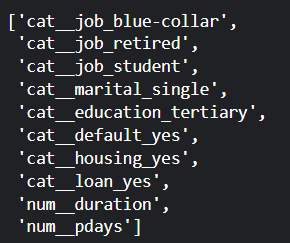

In [41]:
# Transform the data set
#rfe_train = selector_rfe.transform(tr_train)
#rfe_val = selector_rfe.transform(tr_val)

PCA

In [42]:
#pca = PCA(n_components=10)



#pca.fit(tr_train)


In [43]:
#pca_train = pca.transform(tr_train)

#pca_val = pca.transform(tr_val)


In [44]:
#pca.get_feature_names_out()

# Models

 **Model 1: Logistics Regression**

In [45]:
# Applying Logistics Regression without hyperparameter tuning first
logi = LogisticRegression(class_weight= 'balanced').fit(k_train, y_train)
# Using parameter beforehand as dataset is imbalance, as this parameter takes into consideration.

logi_cross = cross_val_score(logi,k_val , y_val, cv=5, scoring='f1_macro')
#crossvalscore creates folds from the provided dataset to test the model performance
print("Mean:",logi_cross.mean().round(2),"\n","Standard Deviation: ", logi_cross.std().round(2))
print("scores:", logi_cross)

Mean: 0.7 
 Standard Deviation:  0.01
scores: [0.69764362 0.69636004 0.70252444 0.68112717 0.71087509]


In [46]:
print("Classification report of train data:")
print(classification_report(y_train, logi.predict(k_train)))


print("Classification report of Validation data:")
print(classification_report(y_val, logi.predict(k_val)))



Classification report of train data:
              precision    recall  f1-score   support

          no       0.94      0.82      0.87     30020
         yes       0.40      0.69      0.51      5269

    accuracy                           0.80     35289
   macro avg       0.67      0.75      0.69     35289
weighted avg       0.86      0.80      0.82     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.94      0.82      0.88      3364
         yes       0.39      0.68      0.49       558

    accuracy                           0.80      3922
   macro avg       0.66      0.75      0.68      3922
weighted avg       0.86      0.80      0.82      3922



Observations:
1. Since the data is imbalance, 94 % of precision from 3364 samples and only 38 % from 558 samples.
2. f1 score for both classes are not in the same range either
3. the train and validation set have done almost same.

In [47]:
"""

param_grid = { #
    'penalty': ['l1', 'l2'], # l1 sum of absolute values of the model coefficients
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear', 'newton-cholesky ' ]
}

grid_search = GridSearchCV(estimator=logi,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='f1_macro',  # scoring metric
                           n_jobs=-1)


grid_search.fit(k_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
"""

'\n\nparam_grid = { #\n    \'penalty\': [\'l1\', \'l2\'], # l1 sum of absolute values of the model coefficients\n    \'C\': [0.001, 0.01, 0.1, 1],\n    \'solver\': [\'liblinear\', \'newton-cholesky \' ]\n}\n\ngrid_search = GridSearchCV(estimator=logi,\n                           param_grid=param_grid,\n                           cv=5,  # 5-fold cross-validation\n                           scoring=\'f1_macro\',  # scoring metric\n                           n_jobs=-1)\n\n\ngrid_search.fit(k_train, y_train)\n\n# Print the best parameters and best score\nprint("Best parameters:", grid_search.best_params_)\nprint("Best score:", grid_search.best_score_)\n'

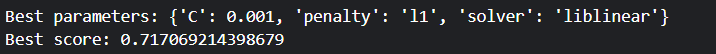

In [48]:
# Using the parameters chosen by the Grid_Search_CV for better performance of the model
logistic_grid = LogisticRegression(solver= 'liblinear',
                                   penalty= 'l2',C= 0.001,random_state=8,
                                   class_weight='balanced' ).fit(k_train, y_train)
logistic_grid_pred = logistic_grid.predict(k_val)

In [49]:
# Using Cross Validation for evaluation of different fold of dataset to check it's performance
logi_cross = cross_val_score(logistic_grid,k_val , y_val, cv=5, scoring='f1_macro')
                            # here used grid chosen model with 5 fold
print("Mean:",logi_cross.mean().round(2),"\n","Standard Deviation: ", logi_cross.std().round(2))
print("scores:", logi_cross)

Mean: 0.68 
 Standard Deviation:  0.02
scores: [0.68767407 0.70243018 0.69469405 0.65757914 0.66911907]


In [50]:
print("Classification report of train data:")
print(classification_report(y_train,logistic_grid.predict(k_train) ))


print("Classification report of Validation data:")
print(classification_report(y_val, logistic_grid_pred))

Classification report of train data:
              precision    recall  f1-score   support

          no       0.93      0.89      0.90     30020
         yes       0.48      0.60      0.53      5269

    accuracy                           0.84     35289
   macro avg       0.70      0.74      0.72     35289
weighted avg       0.86      0.84      0.85     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.93      0.89      0.91      3364
         yes       0.46      0.57      0.51       558

    accuracy                           0.84      3922
   macro avg       0.69      0.73      0.71      3922
weighted avg       0.86      0.84      0.85      3922



There is not much of a differenc after hyperparameter tuning as f1 score has not changed much

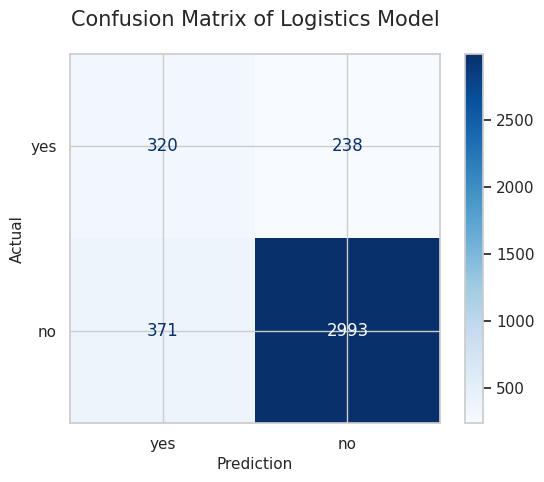

In [51]:
cm = confusion_matrix(y_val, logistic_grid_pred, labels = ['yes', 'no'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Logistics Model', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()

2993 of label no are correctly predicted, and 320 of label yes
which 3313 out of 39211

**Model 2: SVC (Support Vector Classification)**

In [52]:
# Train scv model without any parameters
svc = SVC(class_weight='balanced').fit(k_train, y_train)
# Taking class_weight beforehand as data is imbalanced

In [53]:
svc_cross = cross_val_score(svc,k_val , y_val, cv=5, scoring='f1_macro')
print("Mean:",svc_cross.mean().round(2),"\n","Standard Deviation: ", svc_cross.std().round(2))
print("scores:", svc_cross)

Mean: 0.71 
 Standard Deviation:  0.01
scores: [0.71870779 0.69903701 0.72929293 0.7080956  0.713215  ]


In [54]:
print("Classification report of train data:")
print(classification_report(y_train, svc.predict(k_train)))


print("Classification report of Validation data:")
print(classification_report(y_val, svc.predict(k_val)))


Classification report of train data:
              precision    recall  f1-score   support

          no       0.97      0.80      0.87     30020
         yes       0.42      0.84      0.56      5269

    accuracy                           0.80     35289
   macro avg       0.69      0.82      0.72     35289
weighted avg       0.88      0.80      0.83     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.97      0.80      0.88      3364
         yes       0.41      0.83      0.55       558

    accuracy                           0.80      3922
   macro avg       0.69      0.82      0.71      3922
weighted avg       0.89      0.80      0.83      3922



SVC seems have done a little better, for f1 score of yes label is more than 50 % and the mean of cross_val is 0.71, precision is fairly low

In [55]:
"""
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']

}

# Create a GridSearchCV
grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(tr_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

"""

'\n# Define the parameter grid\nparam_grid = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\']\n\n}\n\n# Create a GridSearchCV\ngrid_search = GridSearchCV(estimator=svc,\n                           param_grid=param_grid,\n                           cv=5,\n                           scoring=\'f1_macro\',\n                           n_jobs=-1)\n\n# Fit the GridSearchCV to the training data\ngrid_search.fit(tr_train, y_train)\n\n# Print the best parameters and best score\nprint("Best parameters:", grid_search.best_params_)\nprint("Best score:", grid_search.best_score_)\n\n'

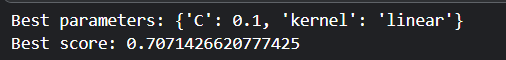

In [56]:
# Using parameters from grid
svc_grid = SVC(random_state=8, class_weight='balanced',C= 0.1,kernel='linear').fit(k_train, y_train)
svc_grid_pred =svc_grid.predict(k_val)

In [57]:
# Using Cross Validation for evaluation of different fold of dataset to check it's performance
svc_cross = cross_val_score(svc_grid,k_val , y_val, cv=5, scoring='f1_macro')
                            # here used grid chosen model with 5 fold
print("Mean:",svc_cross.mean().round(2),"\n","Standard Deviation: ", svc_cross.std().round(2))
print("scores:", svc_cross)

Mean: 0.71 
 Standard Deviation:  0.02
scores: [0.7074203  0.70498283 0.73482559 0.69021455 0.69844369]


In [58]:
print("Classification report of train data:")
print(classification_report(y_train, svc_grid.predict(k_train)))


print("Classification report of Validation data:")
print(classification_report(y_val, svc_grid_pred))

Classification report of train data:
              precision    recall  f1-score   support

          no       0.94      0.85      0.89     30020
         yes       0.45      0.68      0.54      5269

    accuracy                           0.83     35289
   macro avg       0.69      0.77      0.72     35289
weighted avg       0.86      0.83      0.84     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.94      0.86      0.90      3364
         yes       0.43      0.66      0.52       558

    accuracy                           0.83      3922
   macro avg       0.69      0.76      0.71      3922
weighted avg       0.87      0.83      0.84      3922



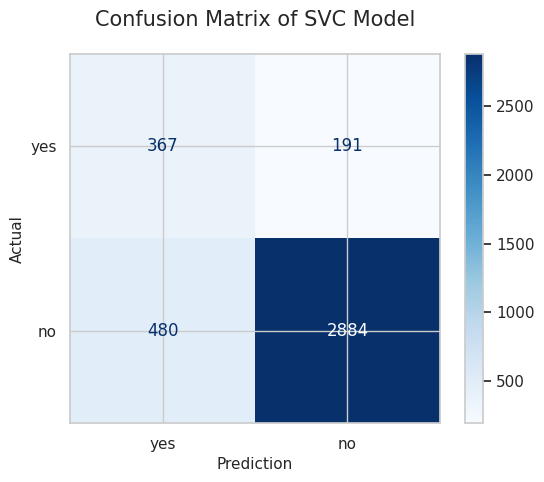

In [59]:
cm = confusion_matrix(y_val, svc_grid_pred, labels = ['yes', 'no'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVC Model', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()

SVC has done better than Logistics, for yes label the False Negative are low, and number of True postives has increased but False postive for no label has increased

**Model 3 : LinearSVC**

In [60]:
lin_svc = LinearSVC(random_state=8, class_weight='balanced').fit(k_train, y_train)

In [61]:
lin_svc_cross = cross_val_score(lin_svc,k_val , y_val, cv=5, scoring='f1_macro')
                            # here used grid chosen model with 5 fold
print("Mean:",lin_svc_cross.mean().round(2),"\n","Standard Deviation: ", lin_svc_cross.std().round(2))
print("scores:", lin_svc_cross)

Mean: 0.69 
 Standard Deviation:  0.01
scores: [0.66790795 0.68056761 0.69636604 0.68386347 0.69802053]


In [62]:
print("Classification report of train data:")
print(classification_report(y_train, lin_svc.predict(k_train)))


print("Classification report of Validation data:")
print(classification_report(y_val, lin_svc.predict(k_val)))


Classification report of train data:
              precision    recall  f1-score   support

          no       0.93      0.80      0.86     30020
         yes       0.36      0.67      0.47      5269

    accuracy                           0.78     35289
   macro avg       0.65      0.73      0.66     35289
weighted avg       0.85      0.78      0.80     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.93      0.79      0.86      3364
         yes       0.34      0.65      0.44       558

    accuracy                           0.77      3922
   macro avg       0.63      0.72      0.65      3922
weighted avg       0.85      0.77      0.80      3922



In [63]:
"""
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'loss': ['squared_hinge'],
    'dual': [False],  # Sample > features
    'max_iter': [1000, 2000]
}

# Create a GridSearchCV
grid_search = GridSearchCV(estimator=lin_svc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(k_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
"""

'\nparam_grid = {\n    \'penalty\': [\'l2\'],\n    \'C\': [0.001, 0.01, 0.1, 1, 10],\n    \'loss\': [\'squared_hinge\'],\n    \'dual\': [False],  # Sample > features\n    \'max_iter\': [1000, 2000]\n}\n\n# Create a GridSearchCV\ngrid_search = GridSearchCV(estimator=lin_svc,\n                           param_grid=param_grid,\n                           cv=5,\n                           scoring=\'f1_macro\',\n                           n_jobs=-1)\n\n# Fit the GridSearchCV to the training data\ngrid_search.fit(k_train, y_train)\n\n# Print the best parameters and best score\nprint("Best parameters:", grid_search.best_params_)\nprint("Best score:", grid_search.best_score_)\n'

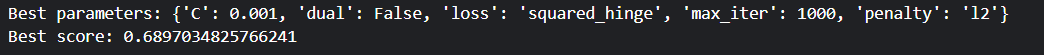

In [64]:
lin_svc_grid = LinearSVC(penalty = 'l2',loss = 'squared_hinge',  dual=False, C= 0.01, max_iter=1000,
                         class_weight = "balanced"
                          ).fit(k_train, y_train)

lin_svc_grid_pred = lin_svc_grid.predict(k_val)

In [65]:
lin_svc_cross = cross_val_score(lin_svc_grid,k_val , y_val, cv=5, scoring='f1_macro')
                            # here used grid chosen model with 5 fold
print("Mean:",lin_svc_cross.mean().round(2),"\n","Standard Deviation: ", lin_svc_cross.std().round(2))
print("scores:", lin_svc_cross)

Mean: 0.69 
 Standard Deviation:  0.01
scores: [0.68790166 0.68145321 0.69964794 0.68949653 0.70543591]


In [66]:
print("Classification report of train data:")
print(classification_report(y_train, lin_svc_grid.predict(k_train)))


print("Classification report of Validation data:")
print(classification_report(y_val,lin_svc_grid_pred))


Classification report of train data:
              precision    recall  f1-score   support

          no       0.93      0.80      0.86     30020
         yes       0.37      0.67      0.47      5269

    accuracy                           0.78     35289
   macro avg       0.65      0.73      0.67     35289
weighted avg       0.85      0.78      0.80     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.93      0.79      0.86      3364
         yes       0.34      0.64      0.45       558

    accuracy                           0.77      3922
   macro avg       0.64      0.72      0.65      3922
weighted avg       0.85      0.77      0.80      3922



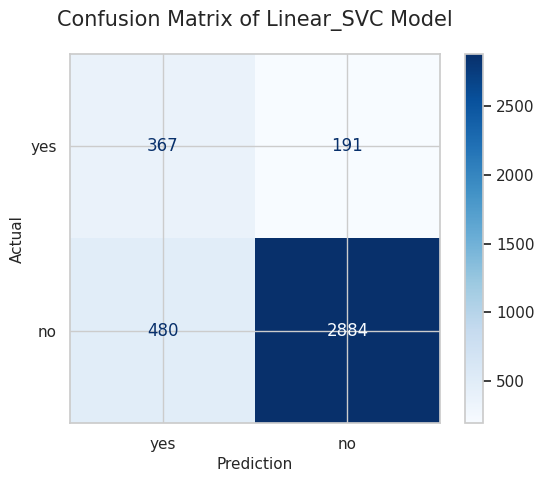

In [67]:
m = confusion_matrix(y_val,lin_svc_grid_pred , labels = ['yes', 'no'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Linear_SVC Model', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()

Linear_svc is overall low by it's average mean and similar to svc performance

**Model 5: DecisionTree Classifier**

In [68]:
dt_classifier = DecisionTreeClassifier(random_state=8, class_weight='balanced').fit(k_train, y_train)

In [69]:
dt_grid = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=8).fit(k_train, y_train)

dt_grid_pred = dt_grid.predict(k_val)

In [70]:
tree_cross = cross_val_score(dt_classifier,k_val , y_val, cv=5, scoring='f1_macro')
print("Mean:",tree_cross.mean().round(2),"\n","Standard Deviation: ", tree_cross.std().round(2))
print("scores:", tree_cross)

Mean: 0.64 
 Standard Deviation:  0.01
scores: [0.64981413 0.62629128 0.65502256 0.6298894  0.65079186]


In [71]:
"""
# Define the parameter grid for binary classification
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='f1_macro',  # Or other relevant binary classification metrics
                           n_jobs=-1)  # Use all available CPU cores

# Fit the GridSearchCV to the training data
grid_search.fit(k_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
"""

'\n# Define the parameter grid for binary classification\nparam_grid = {\n    \'criterion\': [\'gini\', \'entropy\'],  # Splitting criterion\n    \'max_depth\': [None, 5, 10, 15],  # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10],  # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4]  # Minimum number of samples required to be at a leaf node\n}\n\n# Create a GridSearchCV object\ngrid_search = GridSearchCV(estimator=dt_classifier,\n                           param_grid=param_grid,\n                           cv=5,  # 5-fold cross-validation\n                           scoring=\'f1_macro\',  # Or other relevant binary classification metrics\n                           n_jobs=-1)  # Use all available CPU cores\n\n# Fit the GridSearchCV to the training data\ngrid_search.fit(k_train, y_train)\n\n# Print the best parameters and best score\nprint("Best parameters:", grid_search.best_params_)\nprint("Best score:", grid_search.bes

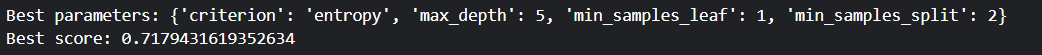

In [72]:
tree_cross = cross_val_score(dt_grid,k_val , y_val, cv=5, scoring='f1_macro')
print("Mean:",tree_cross.mean().round(2),"\n""Standard Deviation: ", tree_cross.std().round(2))
print("scores:", tree_cross)

Mean: 0.72 
Standard Deviation:  0.02
scores: [0.7276827  0.68967377 0.73626374 0.71653985 0.71726653]


In [73]:
print("Classification report of train data:")
print(classification_report(y_train, dt_classifier.predict(k_train)))


print("Classification report of Validation data:")
print(classification_report(y_val, dt_classifier.predict(k_val)))


Classification report of train data:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     30020
         yes       1.00      1.00      1.00      5269

    accuracy                           1.00     35289
   macro avg       1.00      1.00      1.00     35289
weighted avg       1.00      1.00      1.00     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.90      0.90      0.90      3364
         yes       0.41      0.40      0.40       558

    accuracy                           0.83      3922
   macro avg       0.65      0.65      0.65      3922
weighted avg       0.83      0.83      0.83      3922



In [74]:
print("Classification report of train data:")
print(classification_report(y_train, dt_grid.predict(k_train)))


print("Classification report of Validation data:")
print(classification_report(y_val, dt_grid_pred))


Classification report of train data:
              precision    recall  f1-score   support

          no       0.96      0.81      0.88     30020
         yes       0.43      0.79      0.56      5269

    accuracy                           0.81     35289
   macro avg       0.69      0.80      0.72     35289
weighted avg       0.88      0.81      0.83     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.96      0.82      0.89      3364
         yes       0.42      0.79      0.55       558

    accuracy                           0.82      3922
   macro avg       0.69      0.81      0.72      3922
weighted avg       0.88      0.82      0.84      3922



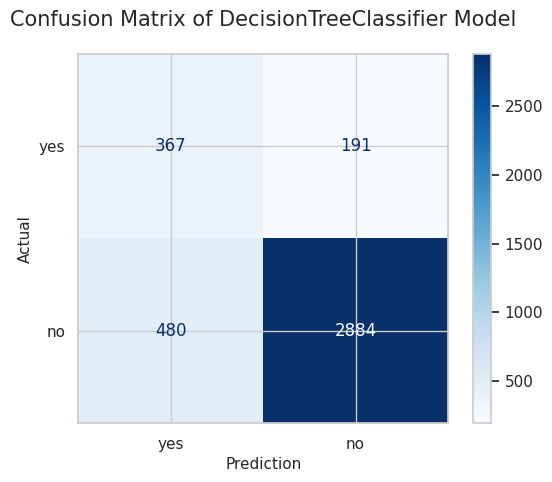

In [75]:
m = confusion_matrix(y_val,dt_grid_pred , labels = ['yes', 'no'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of DecisionTreeClassifier Model', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()

**Model 4: Random Forest Classifier**

In [76]:
rf_classifier = RandomForestClassifier(random_state=8, class_weight='balanced').fit(k_train, y_train)

In [77]:
rf_cross = cross_val_score(rf_classifier,k_val , y_val, cv=5, scoring='f1_macro')
                            # here used grid chosen model with 5 fold
print("Mean:",rf_cross.mean().round(2),"\n","Standard Deviation: ", rf_cross.std().round(2))
print("scores:", rf_cross)

Mean: 0.63 
 Standard Deviation:  0.02
scores: [0.6524551  0.59685177 0.62137576 0.63430399 0.64883815]


In [78]:
print("Classification report of train data:")
print(classification_report(y_train, rf_classifier.predict(k_train)))


print("Classification report of Validation data:")
print(classification_report(y_val, rf_classifier.predict(k_val)))


Classification report of train data:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     30020
         yes       1.00      1.00      1.00      5269

    accuracy                           1.00     35289
   macro avg       1.00      1.00      1.00     35289
weighted avg       1.00      1.00      1.00     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.89      0.95      0.92      3364
         yes       0.51      0.32      0.39       558

    accuracy                           0.86      3922
   macro avg       0.70      0.63      0.66      3922
weighted avg       0.84      0.86      0.85      3922



* Random forest has perfectly well predicted the train data set with the score of 1.0
* With Validation Set, recall and f1 score are less than 50 %

In [79]:
"""
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node

}
grid_search_rf = GridSearchCV(estimator=rf_classifier,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='f1_macro',
                              n_jobs=-1)

grid_search_rf.fit(k_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)

# Get the best score
print("Best score:", grid_search_rf.best_score_)
"""

'\n# Define the parameter grid\nparam_grid_rf = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 5, 10],   # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10],  # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4]  # Minimum number of samples required to be at a leaf node\n\n}\ngrid_search_rf = GridSearchCV(estimator=rf_classifier,\n                              param_grid=param_grid_rf,\n                              cv=5,\n                              scoring=\'f1_macro\',\n                              n_jobs=-1)\n\ngrid_search_rf.fit(k_train, y_train)\n\nprint("Best parameters:", grid_search_rf.best_params_)\n\n# Get the best score\nprint("Best score:", grid_search_rf.best_score_)\n'

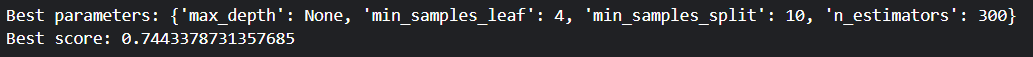

In [80]:
rf_grid = RandomForestClassifier(n_estimators= 200, max_depth = None,
                                min_samples_leaf=2, min_samples_split= 10,
                                class_weight='balanced').fit(k_train, y_train)

rf_grid_pred = rf_grid.predict(k_val)

In [81]:
print("Classification report of train data:")
print(classification_report(y_train, rf_grid.predict(k_train)))


print("Classification report of Validation data:")
print(classification_report(y_val, rf_grid_pred))

Classification report of train data:
              precision    recall  f1-score   support

          no       0.99      0.93      0.96     30020
         yes       0.70      0.94      0.80      5269

    accuracy                           0.93     35289
   macro avg       0.84      0.94      0.88     35289
weighted avg       0.95      0.93      0.93     35289

Classification report of Validation data:
              precision    recall  f1-score   support

          no       0.95      0.88      0.91      3364
         yes       0.49      0.69      0.57       558

    accuracy                           0.85      3922
   macro avg       0.72      0.79      0.74      3922
weighted avg       0.88      0.85      0.86      3922



In [82]:
rf_cross = cross_val_score(rf_grid,k_val , y_val, cv=5, scoring='f1_macro')
                            # here used grid chosen model with 5 fold
print("Mean:",rf_cross.mean().round(2),"\n","Standard Deviation: ", rf_cross.std().round(2))
print("scores:", rf_cross)

Mean: 0.74 
 Standard Deviation:  0.01
scores: [0.74001614 0.72103767 0.74641261 0.72046807 0.7494497 ]


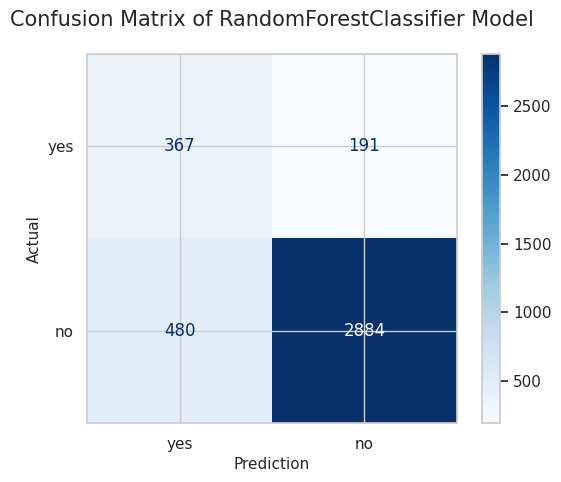

In [83]:
m = confusion_matrix(y_val,rf_grid_pred , labels = ['yes', 'no'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of RandomForestClassifier Model', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()

1. Overall Good score out of the model scores, every score is close to  50 %
2. Hyperparameter significantly improved the model performance.
3. Mean changed from 0.64 to 0.73 almost 10% increase.
4. But the True Postives of label yes is low comparitevly to SVC or LinearSVC model

* Just like Random Forest, 100% accuracy in the train data set,

* but because of data imbalance and less number of yes label, the scores are also low in the       validation set
* precision, recall, f1-score, macro-average  is same for their respective classes (maybe because of the class_weight parameter )

**Model 5: XGBClassifier**

In [84]:
# For XGB Classifier to work the target classes should be numeric
le = LabelEncoder()

y_train_xg = le.fit_transform(y_train) # encode for train data set

y_val_xg =le.fit_transform(y_val) # encode for validation data set

# To know enoced labels correctly
print("For 0 it is encoded as:" ,le.inverse_transform([0]))
print("For 1 it is encoded as:" ,le.inverse_transform([1]))

For 0 it is encoded as: ['no']
For 1 it is encoded as: ['yes']


In [85]:
#Initiate XGBClassifier first
xgb_classifier = XGBClassifier().fit(k_train, y_train_xg)

In [86]:
xgb_cross = cross_val_score(xgb_classifier,k_val , y_val_xg, cv=5, scoring='f1_macro')
print("Mean:",xgb_cross.mean().round(2),"\n","Standard Deviation: ", xgb_cross.std().round(2))
print("scores:", xgb_cross)

Mean: 0.67 
 Standard Deviation:  0.03
scores: [0.67635539 0.62745217 0.63947164 0.69570467 0.69838833]


In [87]:
print("Classification report of train data:")
print(" 0: 'no', 1:'yes'") # For convenience
print(classification_report(y_train_xg, xgb_classifier.predict(k_train)))


print("Classification report of Validation data:")
print(" 0: 'no', 1:'yes'")
print(classification_report(y_val_xg, xgb_classifier.predict(k_val)))


Classification report of train data:
 0: 'no', 1:'yes'
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     30020
           1       0.84      0.64      0.73      5269

    accuracy                           0.93     35289
   macro avg       0.89      0.81      0.84     35289
weighted avg       0.92      0.93      0.92     35289

Classification report of Validation data:
 0: 'no', 1:'yes'
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3364
           1       0.55      0.42      0.48       558

    accuracy                           0.87      3922
   macro avg       0.73      0.68      0.70      3922
weighted avg       0.86      0.87      0.86      3922



In [88]:
"""

# Define the parameter grid for binary classification
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevents overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'n_estimators': [100, 200, 300],  # Number of boosting rounds (trees)
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='f1_macro',  # Or other relevant binary classification metrics
                           n_jobs=-1)  # Use all available CPU cores

# Fit the GridSearchCV to the training data
grid_search.fit(k_train, y_train_xg)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
"""

'\n\n# Define the parameter grid for binary classification\nparam_grid = {\n    \'learning_rate\': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevents overfitting\n    \'max_depth\': [3, 5, 7],  # Maximum depth of a tree\n    \'n_estimators\': [100, 200, 300],  # Number of boosting rounds (trees)\n    \'subsample\': [0.8, 0.9, 1.0],  # Subsample ratio of the training instance\n    \'colsample_bytree\': [0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree\n}\n\n# Create a GridSearchCV object\ngrid_search = GridSearchCV(estimator=xgb_classifier,\n                           param_grid=param_grid,\n                           cv=5,  # 5-fold cross-validation\n                           scoring=\'f1_macro\',  # Or other relevant binary classification metrics\n                           n_jobs=-1)  # Use all available CPU cores\n\n# Fit the GridSearchCV to the training data\ngrid_search.fit(k_train, y_train_xg)\n\n# Print the best parameters and best score

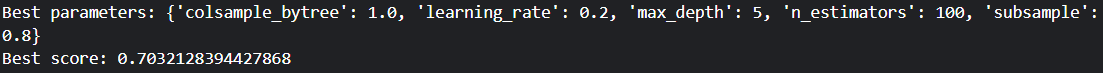

In [89]:
xgb_grid = XGBClassifier(objective='binary:logistic',colsample_bytree=1.0,
                        learning_rate=0.1, max_depth=5,
                        n_estimators=200, subsample= 1.0).fit(k_train, y_train_xg)

xgb_grid_pred=xgb_grid.predict(k_val)

In [90]:
xgb_cross = cross_val_score(xgb_grid,k_val , y_val_xg, cv=5, scoring='f1_macro')
print("Mean:",xgb_cross.mean().round(2),"\n","Standard Deviation: ", xgb_cross.std().round(2))
print("scores:", xgb_cross)

Mean: 0.66 
 Standard Deviation:  0.02
scores: [0.66321676 0.62796787 0.65091773 0.67496218 0.69664068]


In [91]:
print("Classification report of train data:")
print(" 0: 'no', 1:'yes'")
print(classification_report(y_train_xg, xgb_grid.predict(k_train)))


print("Classification report of Validation data:")
print(" 0: 'no', 1:'yes'")
print(classification_report(y_val_xg, xgb_grid_pred))

Classification report of train data:
 0: 'no', 1:'yes'
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     30020
           1       0.74      0.55      0.63      5269

    accuracy                           0.90     35289
   macro avg       0.83      0.76      0.79     35289
weighted avg       0.90      0.90      0.90     35289

Classification report of Validation data:
 0: 'no', 1:'yes'
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3364
           1       0.55      0.41      0.47       558

    accuracy                           0.87      3922
   macro avg       0.73      0.68      0.70      3922
weighted avg       0.86      0.87      0.86      3922



* Recall is low for yes label, which impacted f1 score
* macro avg seems to be

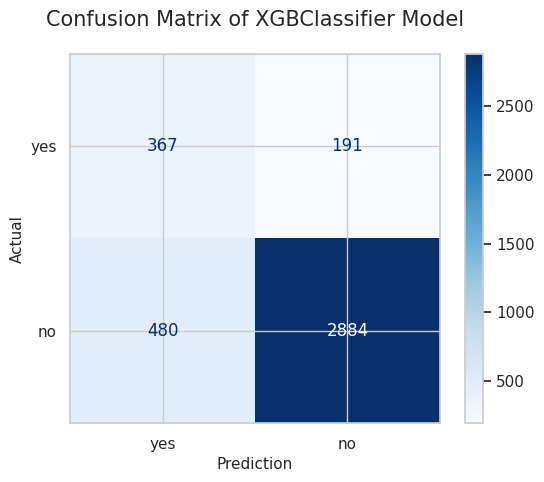

In [92]:
m = confusion_matrix(y_val_xg,xgb_grid_pred , labels = ['0', '1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of XGBClassifier Model', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()

1. The confusion matrix is same as everyone except svc model.
2. In SVC the True Positives of "yes" labels were more, but same also for False negetives for 'no' label
3. In other models, as above the False Negetives for no labels is decreased, correct prediction for 'yes' label is low

# Comparing Models

In [93]:
name = ['Logistics Regression',"SVC",'Linear_SVC',
        'Random Forest Classifier',"DecisionTreeClassifier","XGBClassifier"]

classifiers = [
    logi_cross.mean().round(2),
    svc_cross.mean().round(2),
    lin_svc_cross.mean().round(2),
    rf_cross.mean().round(2),
    tree_cross.mean().round(2),
    xgb_cross.mean().round(2)

]

scores = {} # Create a dictionary to store the score of the models
for name, score in zip(name, classifiers): # Name of the model  and model

    # WIll store score of the respective model
    scores[name] = score

In [94]:
sorted_scores = {key: value for key, value in sorted(scores.items(), key=lambda item: item[1], reverse=True)}
sorted_scores  # List the scores from highest to lowest

{'Random Forest Classifier': 0.74,
 'DecisionTreeClassifier': 0.72,
 'SVC': 0.71,
 'Linear_SVC': 0.69,
 'Logistics Regression': 0.68,
 'XGBClassifier': 0.66}

Observation:
 * By comparing the classificatiion report of the all models and by comparing scores
* Random Forest Classifier had done better than everyone. Hence the Final model Chosen.

# Test Modification

In [95]:
test = pd.read_csv(input_test) # Loading test data as dataframe
test.head(n=5) # same as train data

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [96]:
test.shape

(10000, 15)

In Test data set, there 10,000 rows and 15 columns

In [97]:
# Will do the exact modification done on train data to further predict
test = test.drop(columns=['poutcome', 'last contact date'], axis = 1)
print("After dropping the columns, the shape is now",test.shape)

After dropping the columns, the shape is now (10000, 13)


In [98]:
test_tr = transform_df.transform(test) # Applying pre- processiong to test data using pipeline
print("After pre-processing:",test_tr.shape)

After pre-processing: (10000, 24)


In [99]:
k_test_tr = k_select.transform(test_tr)
# Apply K_select_feature to reduce it's dimenionaltiy and remobe least important features
print("Transformed Data shape:", k_test_tr.shape)

Transformed Data shape: (10000, 10)


# Predictions

In [100]:
#Using Random Forest as final model to predict
rf_pred_test =rf_classifier.predict(k_test_tr) # predicting and storing in the variable for ease

# SUBMISSION

In [101]:
submission = pd.DataFrame( { "id" : np.arange(0, 10000),



                           'target' : rf_pred_test }
                         )
submission.to_csv('submission.csv', index = False)